In [ ]:
# !pip install tensorflow
# !pip install keras

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Flatten
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D
# from keras.layers.embeddings import Embedding
# from keras.preprocessing import sequence
# import pandas as pd
# import numpy as np
# import sklearn
# from sklearn.model_selection import train_test_split
# # Our dictionary will contain only of the top 7000 words appearing most frequently
# # top_words = 7000
# # Now we split our data-set into training and test data
# # (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# # Looking at the nature of training data


In [ ]:
# data = pd.read_csv("/content/gdrive/My Drive/offmychest/data_theo/dataset.csv",engine='python')

# X, y = np.array([post for post in data['comment']]),np.array([label for label in data['label']])
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# print(X_train[0])
# print(y_train[0])
# print('Shape of training data: ')
# print(X_train.shape)
# print(y_train.shape)
# print('Shape of test data: ')
# print(X_test.shape)
# print(y_test.shape)

In [ ]:
# # Padding the data samples to a maximum review length in words
# max_words = 500
# top_words = 7000
# X_train = sequence.pad_sequences(X_train, maxlen=max_words)
# X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# # Building the CNN Model
# model = Sequential()      # initilaizing the Sequential nature for CNN model
# # Adding the embedding layer which will take in maximum of 450 words as input and provide a 32 dimensional output of those words which belong in the top_words dictionary
# model.add(Embedding(top_words, 32, input_length=max_words))
# model.add(Conv1D(32, 3, padding='same', activation='relu'))
# model.add(MaxPooling1D())
# model.add(Flatten())
# model.add(Dense(250, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

In [ ]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("/content/gdrive/My Drive/offmychest/data_theo/dataset.csv",engine='python')
data.sample()

# X = [_ for _ in data['comment']]
# y = [_ for _ in data['label']]

,Unnamed: 0,comment,label
54178,54178,Doesn't practically every country teach the sa...,0.0


In [ ]:
X, y = [],[]
for i in range(len(data)):
  if len(data['comment'][i])>200: #250
    X.append(data['comment'][i])
    y.append(data['label'][i])

In [ ]:
print(len(X),len(y))

31356 31356


In [ ]:
# from sklearn.model_selection import train_test_splitprint(model.words)   # list of words in dictionary
# print(model['king']) 
X_train, X_test , y_train, y_test = train_test_split(X, y , test_size = 0.20)

In [ ]:
vocab_size = 1000
oov_token = "<OOV>"
max_length = 100
padding_type = "post"
trunction_type="post"

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

In [ ]:
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'i': 2,
 'the': 3,
 'to': 4,
 'and': 5,
 'a': 6,
 'it': 7,
 'of': 8,
 'you': 9,
 'that': 10,
 'in': 11,
 'is': 12,
 'my': 13,
 'but': 14,
 'for': 15,
 'was': 16,
 'have': 17,
 'with': 18,
 'so': 19,
 'just': 20,
 'on': 21,
 'be': 22,
 'not': 23,
 'me': 24,
 'this': 25,
 'like': 26,
 'if': 27,
 'they': 28,
 'are': 29,
 'as': 30,
 'or': 31,
 'about': 32,
 'at': 33,
 'people': 34,
 'your': 35,
 'do': 36,
 'all': 37,
 'he': 38,
 'can': 39,
 'because': 40,
 'get': 41,
 'when': 42,
 'what': 43,
 'out': 44,
 'up': 45,
 "it's": 46,
 'we': 47,
 'one': 48,
 'them': 49,
 'would': 50,
 "i'm": 51,
 'really': 52,
 'from': 53,
 'think': 54,
 'know': 55,
 'more': 56,
 'had': 57,
 'how': 58,
 'an': 59,
 'time': 60,
 "don't": 61,
 'some': 62,
 'even': 63,
 'no': 64,
 'there': 65,
 'will': 66,
 'bong': 67,
 'bing': 68,
 'she': 69,
 'her': 70,
 'feel': 71,
 'who': 72,
 'much': 73,
 'their': 74,
 'been': 75,
 'want': 76,
 'it’s': 77,
 'then': 78,
 'being': 79,
 'i’m': 80,
 'only': 81,
 'has':

In [ ]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_train_sequences[10:15]

[[37,
  3,
  463,
  1,
  152,
  324,
  281,
  446,
  18,
  35,
  211,
  633,
  992,
  1,
  1,
  12,
  95,
  6,
  1,
  1,
  63,
  27,
  3,
  1,
  39,
  41,
  223,
  18,
  7,
  35,
  195,
  95,
  1,
  40,
  1,
  416,
  32,
  4,
  1,
  43,
  1,
  4,
  49,
  4,
  22,
  62,
  876,
  1,
  1,
  15,
  197,
  4,
  64,
  1,
  5,
  1,
  182,
  10,
  196,
  427,
  49,
  27,
  28,
  447,
  34,
  1,
  1,
  37,
  3,
  60,
  14,
  3,
  1,
  8,
  25,
  1,
  1],
 [170,
  46,
  26,
  28,
  132,
  11,
  281,
  6,
  1,
  1,
  519,
  8,
  1,
  10,
  28,
  17,
  6,
  105,
  1,
  257,
  973,
  11,
  569,
  30,
  6,
  1,
  25,
  12,
  129,
  2,
  54,
  1,
  1,
  62,
  8,
  3,
  178,
  900,
  148,
  349,
  1,
  1,
  28,
  1,
  18,
  900,
  5,
  46,
  37,
  1,
  92,
  3,
  1,
  1,
  15,
  1,
  5,
  1,
  5,
  1,
  5,
  74,
  1,
  1,
  110,
  284,
  303,
  1,
  5,
  9,
  101,
  7,
  717,
  44,
  1,
  46,
  26,
  6,
  1,
  112,
  74,
  1,
  31,
  96,
  40,
  46,
  11,
  6,
  1,
  121,
  5,
  1,
  4,
  3,
  257,
  1

In [ ]:
X_train_padded = pad_sequences(X_train_sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunction_type)
X_train_padded

array([[ 61,   1,  35, ...,   0,   0,   0],
       [  2, 264,  42, ...,   0,   0,   0],
       [  2,   1,  53, ...,   0,   0,   0],
       ...,
       [ 58,  73,   1, ...,   0,   0,   0],
       [ 15,  24,  28, ...,   0,   0,   0],
       [  3, 446,  12, ...,   0,   0,   0]], dtype=int32)

In [ ]:
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunction_type)

In [ ]:
embeddings_index = {}
f = open('/content/gdrive/My Drive/offmychest/data_theo/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embeddings_index['depression']

array([ 0.10542  , -0.13691  ,  0.15946  ,  0.99195  , -1.1368   ,
        0.18614  ,  0.036245 , -0.6107   , -0.091113 , -0.52332  ,
        0.030946 , -0.35659  , -0.44533  , -0.12095  ,  1.7213   ,
       -0.27306  ,  0.502    , -0.45359  , -0.37612  , -0.36712  ,
        0.32663  ,  0.56371  , -0.58183  ,  0.39254  , -0.48831  ,
        0.4093   , -0.0067719, -1.1515   , -0.33624  ,  0.25515  ,
        0.48866  ,  0.47035  ,  0.046441 ,  0.042582 , -1.1799   ,
        0.19842  ,  0.57576  , -0.28609  , -0.090024 ,  0.61114  ,
       -0.8027   ,  0.097761 , -0.35865  , -0.29034  ,  0.76079  ,
        0.42944  ,  1.1057   ,  0.34321  ,  0.40805  , -0.47787  ,
       -0.63205  , -0.17783  ,  0.050688 ,  0.795    ,  0.84402  ,
       -1.5069   ,  0.51453  , -0.50486  ,  0.56217  ,  1.1522   ,
        0.24492  ,  1.8298   ,  0.33141  , -0.69176  ,  0.27301  ,
        0.629    , -0.015768 , -0.95589  ,  1.0203   , -0.54593  ,
       -0.28555  ,  0.099894 , -0.32071  ,  0.73616  , -0.0568

In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1, max_length))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:

embedding_layer = Embedding(len(word_index) + 1,
                            max_length,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=False)

In [ ]:
embedding_dim = 16 #32
input_length = 100
model = Sequential([
    embedding_layer,
  Bidirectional(LSTM(embedding_dim, return_sequences=True)),
  Bidirectional(LSTM(embedding_dim,)),
  Dense(6, activation='relu'),
  Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          4585600   
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 32)           14976     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                6272      
_________________________________________________________________
dense (Dense)                (None, 6)                 198       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 4,607,053
Trainable params: 21,453
Non-trainable params: 4,585,600
_________________________________________________________________


In [ ]:
num_epochs = 8
print(type(X_train_padded))

y_train = np.array(y_train)
y_test = np.array(y_test)
print(type(y_train))
print(type(y_test))
history = model.fit(X_train_padded, y_train, epochs=num_epochs, validation_data=(X_test_padded, y_test))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Epoch 1/8
784/784 [==============================] - 95s 112ms/step - loss: 0.6903 - accuracy: 0.5231 - val_loss: 0.6828 - val_accuracy: 0.5517
Epoch 2/8
784/784 [==============================] - 86s 109ms/step - loss: 0.6810 - accuracy: 0.5456 - val_loss: 0.6768 - val_accuracy: 0.5614
Epoch 3/8
784/784 [==============================] - 88s 112ms/step - loss: 0.6725 - accuracy: 0.5623 - val_loss: 0.6692 - val_accuracy: 0.5548
Epoch 4/8
784/784 [==============================] - 86s 110ms/step - loss: 0.6639 - accuracy: 0.5707 - val_loss: 0.6630 - val_accuracy: 0.5843
Epoch 5/8
784/784 [==============================] - 85s 108ms/step - loss: 0.6606 - accuracy: 0.5801 - val_loss: 0.6625 - val_accuracy: 0.5805
Epoch 6/8
784/784 [==============================] - 84s 108ms/step - loss: 0.6543 - accuracy: 0.5861 - val_loss: 0.6599 - val_accuracy: 0.5847
Epoch 7/8
784/784 [==============================] - 82s 105ms/s

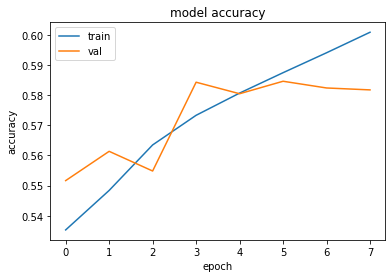

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

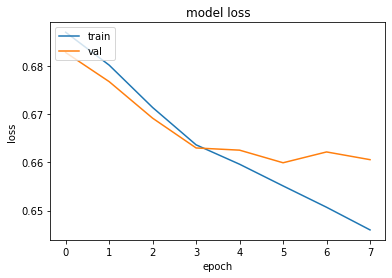

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save_weights('/content/gdrive/My Drive/offmychest/data_theo/ltsm_checkpoint3')

In [ ]:
model.save('/content/gdrive/My Drive/offmychest/data_theo/ltsm_model3')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/offmychest/data_theo/ltsm_model3/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/offmychest/data_theo/ltsm_model3/assets
